In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_set = pd.read_excel("default of credit card clients.xls",header = 1)


In [3]:
data_set

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
data =  data_set.drop(['default payment next month','ID'], axis = 1)

In [5]:
target = data_set['default payment next month']

In [6]:
correlation = data_set.corr('spearman')

In [7]:
correlation

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.030636,0.018497,0.033318,-0.028316,0.024727,-0.025029,-0.004919,-0.009176,-0.004307,...,0.032995,0.015142,0.019961,0.011925,0.050900,0.093546,0.021932,0.012320,0.037875,-0.013952
LIMIT_BAL,0.030636,1.000000,0.056995,-0.263575,-0.113535,0.186485,-0.296461,-0.342596,-0.331615,-0.308658,...,0.072894,0.080694,0.088094,0.272367,0.278401,0.284468,0.283411,0.293749,0.317459,-0.169586
SEX,0.018497,0.056995,1.000000,0.015616,-0.031535,-0.091697,-0.053356,-0.072143,-0.067361,-0.060257,...,-0.023057,-0.015097,-0.010868,-0.003834,0.008007,0.020450,0.013536,0.014731,0.033591,-0.039961
EDUCATION,0.033318,-0.263575,0.015616,1.000000,-0.162415,0.158731,0.132288,0.168715,0.162047,0.151878,...,0.069018,0.060286,0.055977,-0.041727,-0.046651,-0.042048,-0.043324,-0.049463,-0.053060,0.044369
MARRIAGE,-0.028316,-0.113535,-0.031535,-0.162415,1.000000,-0.462810,0.023312,0.036950,0.041867,0.044805,...,0.005736,0.003680,0.004795,-0.003407,-0.015065,-0.012432,-0.015854,-0.012817,-0.014808,-0.026490
AGE,0.024727,0.186485,-0.091697,0.158731,-0.462810,1.000000,-0.063733,-0.083271,-0.083192,-0.080190,...,-0.003330,-0.000342,0.000217,0.033580,0.044192,0.033356,0.040529,0.038125,0.038977,0.005149
PAY_0,-0.025029,-0.296461,-0.053356,0.132288,0.023312,-0.063733,1.000000,0.627170,0.548112,0.516156,...,0.306818,0.298782,0.289055,-0.098315,-0.063549,-0.054153,-0.034312,-0.026223,-0.045015,0.292213
PAY_2,-0.004919,-0.342596,-0.072143,0.168715,0.036950,-0.083271,0.627170,1.000000,0.799388,0.713212,...,0.497540,0.478029,0.459427,0.020401,0.083520,0.087311,0.095036,0.099155,0.082265,0.216919
PAY_3,-0.009176,-0.331615,-0.067361,0.162047,0.041867,-0.083192,0.548112,0.799388,1.000000,0.801047,...,0.531436,0.507209,0.484530,0.215548,0.037020,0.103370,0.118790,0.124204,0.098356,0.194771
PAY_4,-0.004307,-0.308658,-0.060257,0.151878,0.044805,-0.080190,0.516156,0.713212,0.801047,1.000000,...,0.592718,0.561290,0.533639,0.185478,0.246221,0.069251,0.144446,0.161743,0.142570,0.173690


In [8]:
x1 = np.array(data['PAY_0'])
x2 = np.array(data['PAY_2'])
x3 = np.array(data['PAY_3'])
x4 = np.array(data['PAY_4'])
x5 = np.array(data['PAY_5'])
x6 = np.array(data['PAY_6'])
# x7 = np.array(data['BILL_AMT1'])
# x8 = np.array(data['PAY_AMT1'])
y = np.array(target)

In [9]:
x1 = (x1-x1.min())/(x1.max()-x1.min())
x2 = (x2-x2.min())/(x2.max()-x2.min())
x3 = (x3-x3.min())/(x3.max()-x3.min())
x4 = (x4-x4.min())/(x4.max()-x4.min())
x5 = (x5-x5.min())/(x5.max()-x5.min())
x6 = (x6-x6.min())/(x6.max()-x6.min())
# x7 = (x7-x7.min())/(x7.max()-x7.min())
# x8 = (x8-x8.min())/(x8.max()-x8.min())



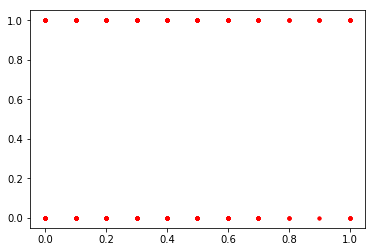

In [10]:
plt.plot(x1,y,'r.')

xt1, xs1, xt2,xs2,xt3,xs3,xt4,xs4,xt5,xs5,xt6,xs6, yt, ys = train_test_split(x1,x2,x3,x4,x5,x6,y,test_size =0.5)

In [19]:
xt1, xs1, xt2,xs2,xt3,xs3,xt4,xs4,xt5,xs5,xt6,xs6, yt, ys = train_test_split(x1,x2,x3,x4,x5,x6,y,test_size =0.5)

In [20]:
def hypo(a,b,c,d,e,f,q,x1,x2,x3,x4,x5,x6):
#     print(1/(1+np.exp(-((a*x1) +(b*x2) + (c*x3)+ (d*x4)+ (e*x5)+ (f*x6)+ (g*x7)+ (h*x8) + i))))
    return 1/(1+np.exp(-((a*x1) +(b*x2) + (c*x3)+ (d*x4)+ (e*x5)+ (f*x6) + q)))

In [21]:
def error(a,b,c,d,e,f,q,x1,x2,x3,x4,x5,x6,y):
    e1 = 0 
    m = len(x1)
    
    for i in range(m):
        e1 += (-(y[i]*np.log(hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]))) - ((1-y[i]) * np.log(1-hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]))))
    
    return (1/m) * e1

In [22]:
def step_gradient(a,b,c,d,e,f,q,x1,x2,x3,x4,x5,x6, y, learning_rate):
    grad_a = 0 
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_e = 0
    grad_f = 0

    grad_q = 0
    
    m = len(x1)
    
    for i in range(m):
        grad_a += (hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]) - y[i]) * x1[i]
        grad_b +=  (hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]) - y[i]) * x2[i]
        grad_c +=  (hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]) - y[i]) * x3[i]
        grad_d += (hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]) - y[i]) * x4[i]
        grad_e +=  (hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]) - y[i]) * x5[i]
        grad_f +=  (hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]) - y[i]) * x6[i] 
#         grad_g += (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x7[i]
#         grad_h += (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x8[i]
        grad_q += (hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]) - y[i])
        
    a= a - grad_a * learning_rate
    b= b - grad_b * learning_rate
    c= c - grad_c * learning_rate
    d= d - grad_d * learning_rate
    e= e - grad_e * learning_rate
    f= f - grad_f * learning_rate
#     g= g - grad_g * learning_rate
#     h = h- grad_h * learning_rate
    q = q - grad_q * learning_rate
    
    return a,b,c,d,e,f,q

In [23]:
def descend(init_a,init_b,init_c,init_d,init_e,init_f,init_q,x1,x2,x3,x4,x5,x6,y,learning_rate,iterations):
    a = init_a
    b = init_b
    c = init_c
    d = init_d
    e = init_e
    f = init_f

    q = init_q
    
    for i in  range(iterations):
        e1 = error(a,b,c,d,e,f,q,x1,x2,x3,x4,x5,x6,y)
        if i%100 == 0:
            print(f"error: {e1}, a:{a}, b: {b}, c: {c}, d: {d}, e: {e}, f: {f}, q: {q}")
        a,b,c,d,e,f,q= step_gradient(a,b,c,d,e,f,q,x1,x2,x3,x4,x5,x6, y, learning_rate)
    return a,b,c,d,e,f,q

In [24]:
final_a = 0
final_b = 0
final_c = 0
final_d = 0
final_e = 0
final_f = 0
final_g = 0
final_h = 0
final_q = 0
iterations = 1000
learning_rate = 0.0001

In [26]:
for i in range(3):
    final_a ,  final_b, final_c, final_d, final_e, final_f, final_q = descend(final_a ,  final_b, final_c, final_d, final_e, final_f, final_q,xt1,xt2,xt3,xt4,xt5,xt6,yt,learning_rate,iterations)

error: 0.6931471805600756, a:0, b: 0, c: 0, d: 0, e: 0, f: 0, q: 0
error: 0.4932711848655855, a:1.3021882062191148, b: 0.902504200421753, c: 0.7596540457156153, d: 0.5963760919899789, e: 0.5149976965296704, f: 0.40553778542459806, q: -2.1019827922523557
error: 0.48523722239207845, a:2.1799265263364105, b: 1.2803439699532766, c: 1.0148887186775304, d: 0.7171005374991539, e: 0.6086338836136383, f: 0.42933487422262234, q: -2.4895911947022253
error: 0.48204314500927725, a:2.818588745699737, b: 1.4322604468752285, c: 1.080919813362533, d: 0.6813125456717796, e: 0.5694984871194244, f: 0.33513749009692095, q: -2.651026739146416
error: 0.4801210869049425, a:3.3244972717979375, b: 1.4906527555777498, c: 1.0860646336179407, d: 0.610434755345476, e: 0.507442368642761, f: 0.22508813010103831, q: -2.7329318610847406
error: 0.47882837444001863, a:3.740055888058803, b: 1.5033567563196548, c: 1.0718692671878254, d: 0.5395273343679734, e: 0.45240160310521127, f: 0.12629511916365024, q: -2.7834688379310

In [27]:
def accuracy(a,b,c,d,e,f,q,x1,x2,x3,x4,x5,x6,y):
    correct = 0
    m = len(x1)
    
    for i in range(m):
        pred = hypo(a,b,c,d,e,f,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i])
        if pred > 0.5:
            z = 1
        else:
            z = 0
        
        if y[i] == z:
            correct +=1
    print(f"accuracy: {correct/len(y)}")

In [28]:
accuracy(final_a ,  final_b, final_c, final_d, final_e, final_f, final_q,xs1,xs2,xs3,xs4,xs5,xs6,ys)

accuracy: 0.8099333333333333
